## Loading Train and Test Data from the 3 Classes

Displaying sample training images:
Training set size: 225
Testing set size: 75


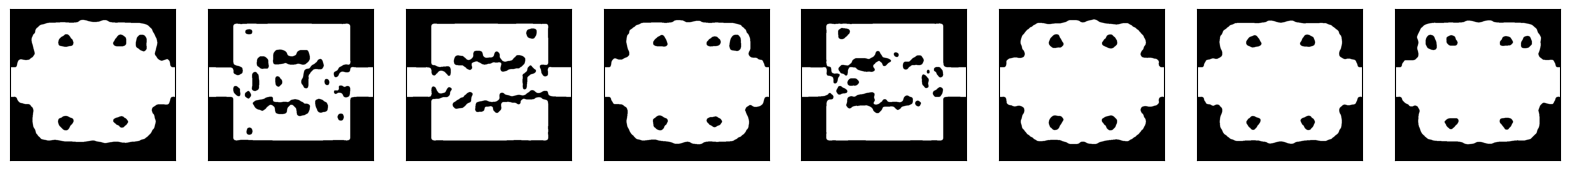

In [13]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load grayscale images without resizing
def load_grayscale_images(path, label):
    """
    Loads grayscale images from the given path without resizing and assigns labels.

    Parameters:
        path (str): Directory path containing the images.
        label (int): Label for the images.

    Returns:
        images (list): List of image arrays in original size.
        labels (list): List of corresponding labels.
    """
    images = []
    labels = []

    for file in os.listdir(path):
        if file.endswith(".bmp"):  # Process only BMP files
            img_path = os.path.join(path, file)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            images.append(np.array(img))  # Convert to numpy array
            labels.append(label)  # Assign label

    return images, labels

# Function to display sample grayscale images
def show_grayscale_images(images, num_images=8):
    """
    Displays a few grayscale images from the dataset.

    Parameters:
        images (list): List of grayscale image arrays to display.
        num_images (int): Number of images to display.
    """
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images

# Folder paths
folder_paths = {
    "no_phase": 'Phase_shifter-new/no_phase/no_phase_first100',
    "pi_by_2_phase": 'Phase_shifter-new/pi_by_2_phase/pi_by_2_phase_first100',
    "zero_phase": 'Phase_shifter-new/zero_phase/zero_phase_first100'
}

# Initialize lists for images and labels
x_train = []
y_train = []
x_test = []
y_test = []

# Load grayscale images and labels for each category without resizing
no_phase_images, no_phase_labels = load_grayscale_images(folder_paths["no_phase"], 0)
pi_by_2_phase_images, pi_by_2_phase_labels = load_grayscale_images(folder_paths["pi_by_2_phase"], 1)
zero_phase_images, zero_phase_labels = load_grayscale_images(folder_paths["zero_phase"], 2)

# Combine images and labels
x_train = no_phase_images + pi_by_2_phase_images + zero_phase_images
y_train = no_phase_labels + pi_by_2_phase_labels + zero_phase_labels

# Convert lists to numpy arrays
x_train = np.array(x_train, dtype="float32") / 255.0  # Normalize grayscale pixel values to [0, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Add a channel dimension for grayscale (e.g., (height, width, 1))
y_train = np.array(y_train, dtype="int")  # Convert labels to numpy array

# Split into training and testing sets (e.g., 75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=16)

# Display a few sample training images
print("Displaying sample training images:")
show_grayscale_images(x_train)
print(f"Training set size: {x_train.shape[0]}")
print(f"Testing set size: {x_test.shape[0]}")


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(711, 651, 1)))  # Update input_shape for grayscale
model.add(MaxPooling2D(2, 2))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Fourth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flattening and fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))  # Fully connected layer
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 709, 649, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 354, 324, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 352, 322, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 176, 161, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 174, 159, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 87, 79, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 85, 77, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 42, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 204288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   209,191,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,527,491 (799.28 MB)

 Trainable params: 209,527,491 (799.28 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Check the shape of y_train and y_test
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train the model
hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=10
)


y_train shape: (225, 3)
y_test shape: (75, 3)
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7443 - loss: 5.0404 - val_accuracy: 0.9867 - val_loss: 0.0555
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9960 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9955 - loss: 0.1582 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 3.1365e-05
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 1.0000 - loss: 5.7187e-05 - val_accuracy: 1.0000 - val_loss: 5.7172e-06
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 1.0000 - loss: 1.9060e-05 - val_accuracy: 1.0000 - val_loss: 2.7879e-06
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 1.0000 - loss: 7.2445e-06 - val_accuracy: 1.0000 - val_loss: 2.1728e-06
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83

  2%|▏         | 7/300 [00:00<00:05, 57.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


  6%|▌         | 18/300 [00:01<00:19, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


  9%|▉         | 28/300 [00:02<00:20, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


 12%|█▏        | 37/300 [00:03<00:21, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


 16%|█▌        | 47/300 [00:04<00:19, 12.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


 18%|█▊        | 54/300 [00:04<00:23, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


 22%|██▏       | 66/300 [00:05<00:18, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


 25%|██▌       | 76/300 [00:06<00:17, 12.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


 29%|██▊       | 86/300 [00:07<00:16, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


 32%|███▏      | 97/300 [00:08<00:14, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


 35%|███▌      | 106/300 [00:09<00:15, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


 39%|███▊      | 116/300 [00:10<00:14, 12.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


 42%|████▏     | 126/300 [00:11<00:13, 13.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


 45%|████▌     | 136/300 [00:12<00:12, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


 49%|████▊     | 146/300 [00:13<00:11, 13.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


 52%|█████▏    | 156/300 [00:14<00:11, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


 55%|█████▌    | 166/300 [00:15<00:10, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


 59%|█████▊    | 176/300 [00:16<00:10, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


 62%|██████▏   | 185/300 [00:17<00:11, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


 65%|██████▌   | 196/300 [00:18<00:09, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


 69%|██████▉   | 207/300 [00:19<00:07, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


 72%|███████▏  | 217/300 [00:20<00:06, 12.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


 76%|███████▌  | 227/300 [00:21<00:05, 12.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


 79%|███████▊  | 236/300 [00:22<00:05, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


 82%|████████▏ | 246/300 [00:23<00:04, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


 85%|████████▌ | 255/300 [00:24<00:03, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


 89%|████████▊ | 266/300 [00:24<00:02, 12.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


 92%|█████████▏| 275/300 [00:25<00:02, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 96%|█████████▌| 287/300 [00:26<00:00, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


 99%|█████████▊| 296/300 [00:27<00:00, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


100%|██████████| 300/300 [00:28<00:00, 10.53it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


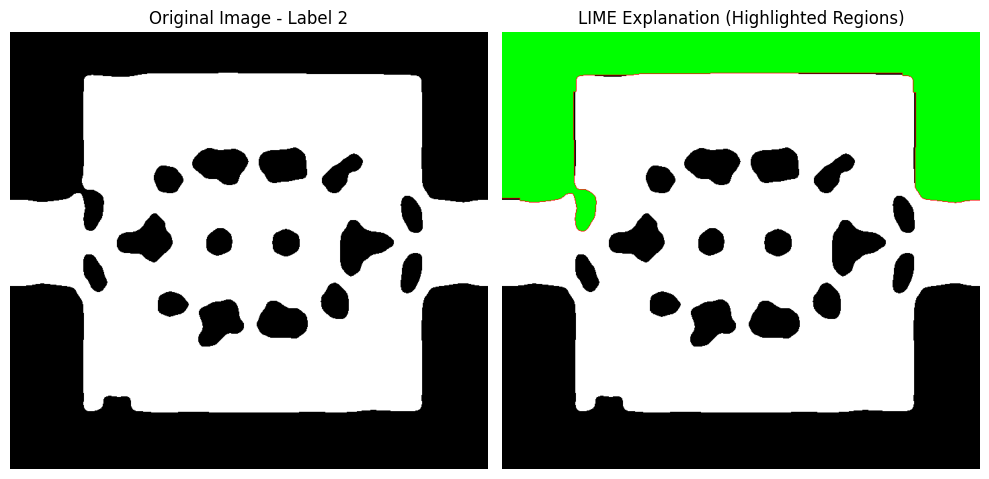

  3%|▎         | 8/300 [00:00<00:03, 74.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  5%|▌         | 16/300 [00:00<00:20, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


  9%|▉         | 27/300 [00:01<00:19, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


 13%|█▎        | 39/300 [00:02<00:17, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


 14%|█▍        | 43/300 [00:03<00:26,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


 19%|█▉        | 57/300 [00:04<00:19, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


 23%|██▎       | 69/300 [00:05<00:16, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


 25%|██▍       | 74/300 [00:06<00:21, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


 29%|██▉       | 87/300 [00:07<00:16, 13.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


 31%|███▏      | 94/300 [00:08<00:19, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


 35%|███▌      | 106/300 [00:09<00:15, 12.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


 39%|███▊      | 116/300 [00:10<00:14, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


 42%|████▏     | 127/300 [00:11<00:12, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


 46%|████▌     | 138/300 [00:12<00:11, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


 47%|████▋     | 142/300 [00:13<00:16,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


 52%|█████▏    | 156/300 [00:13<00:11, 12.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


 56%|█████▌    | 167/300 [00:14<00:09, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


 59%|█████▉    | 177/300 [00:15<00:09, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


 63%|██████▎   | 188/300 [00:17<00:09, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


 66%|██████▋   | 199/300 [00:18<00:07, 12.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


 68%|██████▊   | 203/300 [00:18<00:10,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


 72%|███████▏  | 217/300 [00:19<00:06, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


 76%|███████▌  | 228/300 [00:20<00:05, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


 79%|███████▉  | 238/300 [00:22<00:05, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 249/300 [00:23<00:04, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


 84%|████████▍ | 253/300 [00:24<00:05,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


 89%|████████▉ | 268/300 [00:25<00:02, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


 91%|█████████ | 272/300 [00:25<00:02,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 95%|█████████▌| 286/300 [00:26<00:01, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


 99%|█████████▉| 298/300 [00:27<00:00, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


100%|██████████| 300/300 [00:28<00:00, 10.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


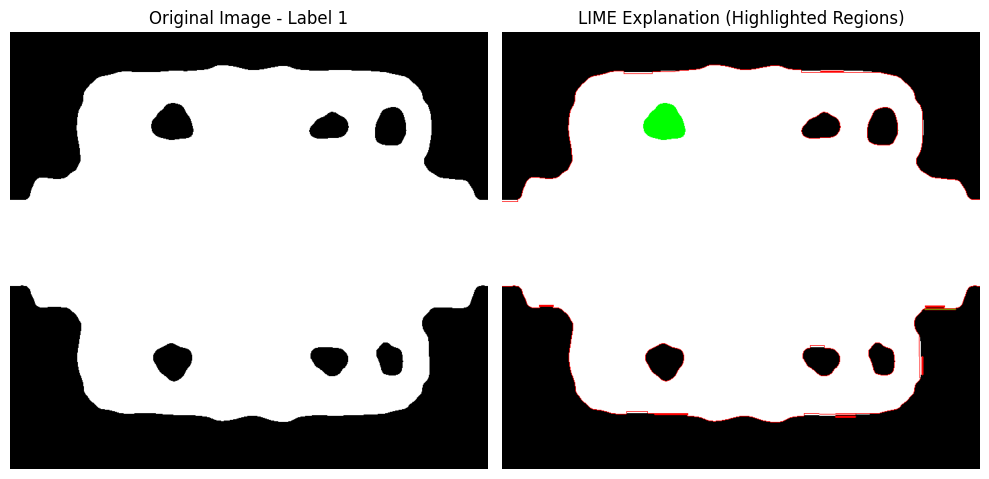

  3%|▎         | 8/300 [00:00<00:04, 71.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


  5%|▌         | 16/300 [00:01<00:20, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


  9%|▊         | 26/300 [00:01<00:21, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


 12%|█▏        | 36/300 [00:02<00:20, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


 15%|█▌        | 46/300 [00:03<00:19, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 19%|█▊        | 56/300 [00:04<00:18, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


 22%|██▏       | 66/300 [00:05<00:17, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


 25%|██▌       | 76/300 [00:06<00:16, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


 29%|██▊       | 86/300 [00:07<00:15, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


 32%|███▏      | 96/300 [00:08<00:14, 13.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


 35%|███▌      | 106/300 [00:09<00:14, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


 39%|███▊      | 116/300 [00:09<00:13, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


 42%|████▏     | 126/300 [00:11<00:15, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


 45%|████▌     | 136/300 [00:12<00:13, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 49%|████▊     | 146/300 [00:12<00:12, 12.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


 52%|█████▏    | 156/300 [00:13<00:11, 13.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


 55%|█████▌    | 166/300 [00:14<00:10, 13.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


 59%|█████▊    | 176/300 [00:15<00:09, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


 62%|██████▏   | 186/300 [00:16<00:08, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


 65%|██████▌   | 196/300 [00:17<00:07, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


 69%|██████▉   | 207/300 [00:18<00:06, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


 73%|███████▎  | 218/300 [00:19<00:05, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


 76%|███████▋  | 229/300 [00:20<00:04, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


 80%|███████▉  | 239/300 [00:21<00:04, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


 83%|████████▎ | 249/300 [00:21<00:03, 13.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


 86%|████████▌ | 258/300 [00:22<00:03, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


 89%|████████▉ | 268/300 [00:24<00:02, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


 93%|█████████▎| 278/300 [00:24<00:01, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


 96%|█████████▌| 288/300 [00:25<00:00, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 299/300 [00:27<00:00, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


100%|██████████| 300/300 [00:28<00:00, 10.63it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


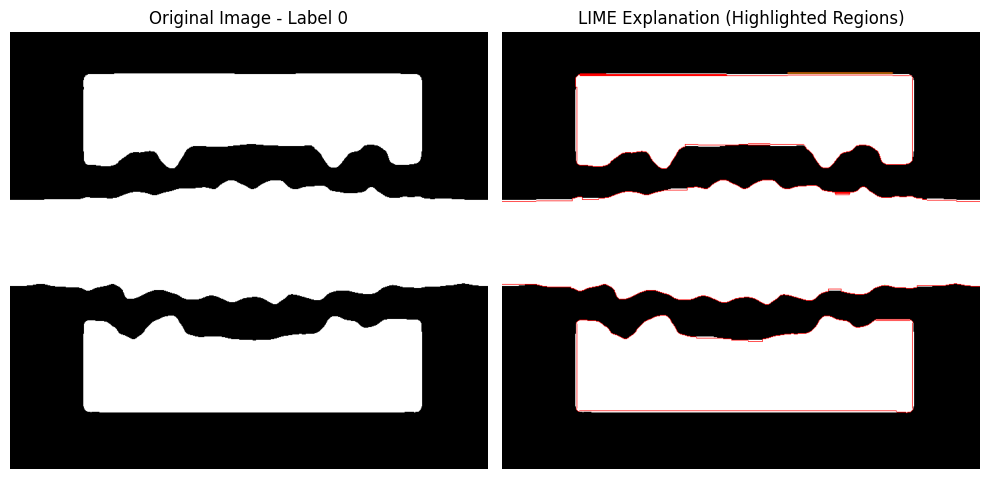

  2%|▏         | 6/300 [00:00<00:05, 49.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


  5%|▌         | 16/300 [00:01<00:19, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  8%|▊         | 25/300 [00:02<00:21, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


 12%|█▏        | 35/300 [00:02<00:21, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 15%|█▌        | 45/300 [00:03<00:20, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


 18%|█▊        | 55/300 [00:04<00:19, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


 22%|██▏       | 65/300 [00:05<00:18, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


 25%|██▌       | 75/300 [00:06<00:17, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


 28%|██▊       | 85/300 [00:07<00:16, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


 32%|███▏      | 96/300 [00:08<00:15, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


 36%|███▋      | 109/300 [00:09<00:13, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


 39%|███▉      | 118/300 [00:10<00:14, 12.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


 42%|████▏     | 125/300 [00:11<00:15, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 45%|████▌     | 135/300 [00:12<00:13, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 48%|████▊     | 145/300 [00:13<00:12, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 52%|█████▏    | 156/300 [00:13<00:10, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 55%|█████▌    | 165/300 [00:14<00:10, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


 59%|█████▊    | 176/300 [00:15<00:09, 13.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


 62%|██████▏   | 186/300 [00:16<00:08, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


 65%|██████▌   | 195/300 [00:17<00:08, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


 68%|██████▊   | 205/300 [00:18<00:07, 12.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 214/300 [00:19<00:08,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step


 75%|███████▌  | 225/300 [00:20<00:07, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


 78%|███████▊  | 235/300 [00:21<00:05, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


 82%|████████▏ | 246/300 [00:22<00:04, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


 85%|████████▌ | 255/300 [00:23<00:03, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


 88%|████████▊ | 265/300 [00:24<00:02, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


 92%|█████████▏| 275/300 [00:25<00:02, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


 95%|█████████▌| 285/300 [00:26<00:01, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


 98%|█████████▊| 295/300 [00:28<00:00, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


100%|██████████| 300/300 [00:29<00:00, 10.33it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


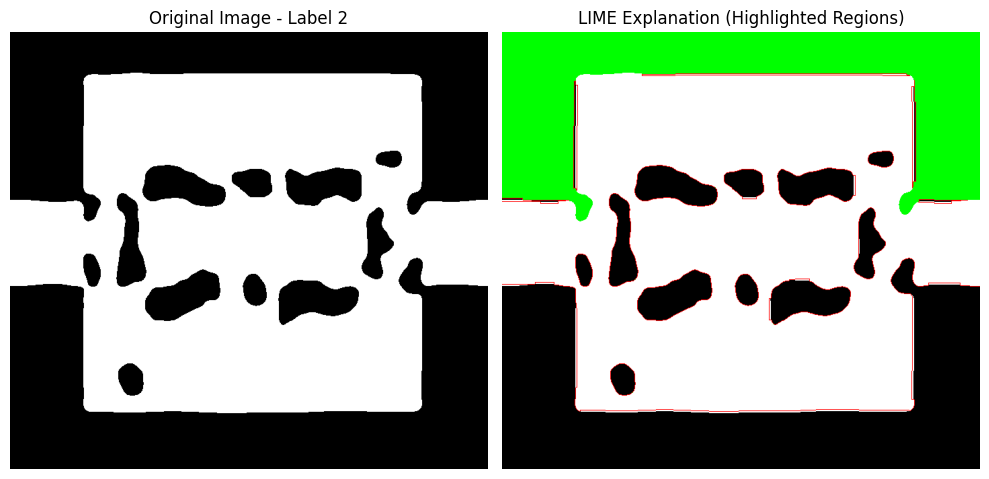

  2%|▏         | 7/300 [00:00<00:04, 59.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


  6%|▋         | 19/300 [00:01<00:17, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


 10%|▉         | 29/300 [00:02<00:20, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


 13%|█▎        | 39/300 [00:03<00:22, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


 16%|█▋        | 49/300 [00:04<00:20, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


 20%|█▉        | 59/300 [00:05<00:19, 12.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


 23%|██▎       | 69/300 [00:06<00:17, 12.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


 25%|██▌       | 76/300 [00:07<00:21, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


 29%|██▊       | 86/300 [00:07<00:18, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


 32%|███▏      | 95/300 [00:08<00:17, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


 35%|███▌      | 106/300 [00:09<00:14, 13.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


 39%|███▊      | 116/300 [00:10<00:13, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


 42%|████▏     | 126/300 [00:11<00:13, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


 45%|████▌     | 135/300 [00:12<00:13, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 48%|████▊     | 145/300 [00:13<00:12, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 52%|█████▏    | 156/300 [00:14<00:10, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


 55%|█████▌    | 166/300 [00:15<00:10, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


 59%|█████▊    | 176/300 [00:16<00:09, 13.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 62%|██████▏   | 186/300 [00:17<00:08, 13.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


 65%|██████▌   | 196/300 [00:17<00:07, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


 68%|██████▊   | 205/300 [00:19<00:08, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


 72%|███████▏  | 217/300 [00:20<00:06, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


 76%|███████▌  | 228/300 [00:21<00:05, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


 79%|███████▉  | 237/300 [00:22<00:05, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step


 82%|████████▏ | 246/300 [00:23<00:05, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


 85%|████████▌ | 256/300 [00:24<00:03, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


 90%|████████▉ | 269/300 [00:25<00:02, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


 93%|█████████▎| 279/300 [00:26<00:01, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


 96%|█████████▋| 289/300 [00:27<00:00, 13.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


100%|█████████▉| 299/300 [00:27<00:00, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


100%|██████████| 300/300 [00:28<00:00, 10.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


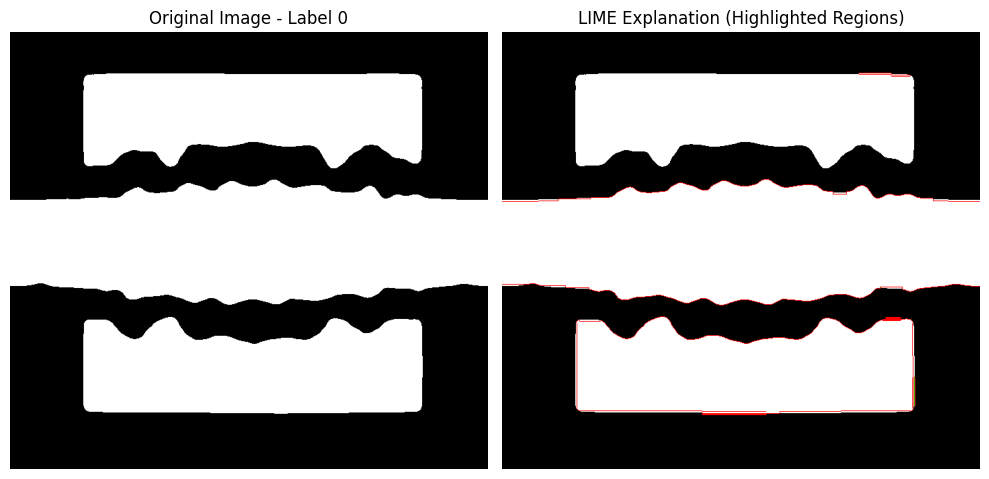

  3%|▎         | 8/300 [00:00<00:03, 77.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


  5%|▌         | 16/300 [00:00<00:19, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


  9%|▉         | 27/300 [00:01<00:17, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 11%|█         | 32/300 [00:02<00:24, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


 13%|█▎        | 40/300 [00:03<00:24, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 19%|█▊        | 56/300 [00:04<00:17, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


 22%|██▏       | 67/300 [00:05<00:15, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


 26%|██▌       | 78/300 [00:06<00:15, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


 29%|██▉       | 88/300 [00:07<00:15, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


 33%|███▎      | 99/300 [00:08<00:14, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


 35%|███▍      | 104/300 [00:08<00:19,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


 39%|███▉      | 118/300 [00:10<00:15, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


 43%|████▎     | 129/300 [00:11<00:13, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


 44%|████▍     | 133/300 [00:12<00:19,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


 49%|████▉     | 148/300 [00:13<00:12, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


 53%|█████▎    | 159/300 [00:14<00:12, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 166/300 [00:16<00:18,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 179/300 [00:17<00:12,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 183/300 [00:19<00:19,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 199/300 [00:20<00:10,  9.51it/s]


KeyboardInterrupt: 

In [18]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.segmentation import felzenszwalb

# Define the prediction function
def predict_fn(images):
    grayscale_images = np.expand_dims(np.mean(images, axis=-1), axis=-1)
    return model.predict(grayscale_images)

# Initialize the explainer
explainer = lime_image.LimeImageExplainer()

# Loop through the test images
for i, image in enumerate(x_test):
    sample_image = cv2.cvtColor((image.squeeze() * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

    # Run LIME explanation with improved segmentation
    explanation = explainer.explain_instance(
        sample_image.astype('double'),
        predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=300,
        segmentation_fn=felzenszwalb  # Test with another segmentation method
    )

    # Extract explanation
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,  # Include both positive and negative contributions
        num_features=10,
        hide_rest=False
    )

    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Original image
    ax1.imshow(sample_image, cmap='gray')
    ax1.set_title(f"Original Image - Label {np.argmax(y_test[i])}")
    ax1.axis('off')

    # Explanation visualization
    ax2.imshow(mark_boundaries(temp, mask, color=(1, 0, 0)))
    ax2.set_title("LIME Explanation (Highlighted Regions)")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()
